In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 2
lr = 1.0e-4
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 0.0001 focal loss, gamma: 2 wd: 0.0, Lora alpha 8, rank 8


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	38.5927	Val Loss:	3.8228	Accuracy:	0.0858	F1:	0.0663
2 / 30: Train Loss:	22.5283	Val Loss:	2.6925	Accuracy:	0.1065	F1:	0.1120
3 / 30: Train Loss:	19.9457	Val Loss:	2.5347	Accuracy:	0.1124	F1:	0.1176
4 / 30: Train Loss:	18.3876	Val Loss:	2.4620	Accuracy:	0.0976	F1:	0.0955
5 / 30: Train Loss:	17.9949	Val Loss:	2.3463	Accuracy:	0.1183	F1:	0.1149
6 / 30: Train Loss:	17.0500	Val Loss:	2.2777	Accuracy:	0.1302	F1:	0.1283
7 / 30: Train Loss:	16.7685	Val Loss:	2.2355	Accuracy:	0.1479	F1:	0.1444
8 / 30: Train Loss:	15.9542	Val Loss:	2.2114	Accuracy:	0.1450	F1:	0.1384
9 / 30: Train Loss:	15.7535	Val Loss:	2.1893	Accuracy:	0.1538	F1:	0.1462
10 / 30: Train Loss:	15.7246	Val Loss:	2.1731	Accuracy:	0.1627	F1:	0.1547
11 / 30: Train Loss:	15.4433	Val Loss:	2.1576	Accuracy:	0.1805	F1:	0.1715
12 / 30: Train Loss:	15.0759	Val Loss:	2.1450	Accuracy:	0.1864	F1:	0.1738
13 / 30: Train Loss:	15.1249	Val Loss:	2.1265	Accuracy:	0.2101	F1:	0.2019
14 / 30: Train Loss:	14.7240	Val Loss:	2.1059	A

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	35.3611	Val Loss:	3.3475	Accuracy:	0.0769	F1:	0.0603
2 / 30: Train Loss:	20.8549	Val Loss:	2.5752	Accuracy:	0.1095	F1:	0.1149
3 / 30: Train Loss:	19.1140	Val Loss:	2.4245	Accuracy:	0.1036	F1:	0.1024
4 / 30: Train Loss:	17.5743	Val Loss:	2.3648	Accuracy:	0.1154	F1:	0.1150
5 / 30: Train Loss:	17.2188	Val Loss:	2.2837	Accuracy:	0.1331	F1:	0.1328
6 / 30: Train Loss:	16.4246	Val Loss:	2.2449	Accuracy:	0.1243	F1:	0.1222
7 / 30: Train Loss:	16.3409	Val Loss:	2.2155	Accuracy:	0.1361	F1:	0.1359
8 / 30: Train Loss:	15.8119	Val Loss:	2.1996	Accuracy:	0.1331	F1:	0.1284
9 / 30: Train Loss:	15.4956	Val Loss:	2.1862	Accuracy:	0.1391	F1:	0.1343
10 / 30: Train Loss:	15.5226	Val Loss:	2.1746	Accuracy:	0.1538	F1:	0.1497
11 / 30: Train Loss:	15.3210	Val Loss:	2.1550	Accuracy:	0.1627	F1:	0.1613
12 / 30: Train Loss:	14.8925	Val Loss:	2.1416	Accuracy:	0.1834	F1:	0.1855
13 / 30: Train Loss:	14.8993	Val Loss:	2.1057	Accuracy:	0.2130	F1:	0.2162
14 / 30: Train Loss:	14.3638	Val Loss:	2.0704	A

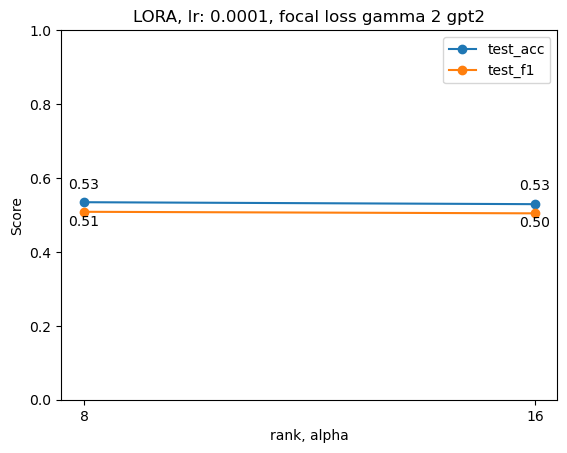

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f